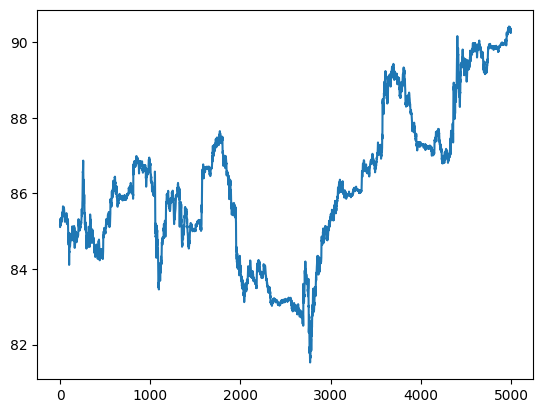

In [1]:
from polygon import RESTClient
from datetime import datetime
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

# Fetch historical stock data using Polygon
stock_symbol_1 = "AMZN"
client = RESTClient("yqvFF3xXbbTJiAzHwPa3AaIEc5pxJfjo")
aggs = client.get_aggs(stock_symbol_1, 1, "minute", "2023-01-01", "2023-01-31")
y_close = []
for i in range(0, len(aggs), 1):
  agg = aggs[i]
  # xs.append(datetime.fromtimestamp(agg.timestamp // 1000).time().strftime("%H:%M"))
  y_close.append(agg.close)
plt.plot(np.array(y_close))
plt.show()

In [2]:
values = np.array(y_close)
scaler = MinMaxScaler(feature_range=(0,1))
values_scaled = scaler.fit_transform(values.reshape(-1, 1))
training_split = math.floor(len(values_scaled) * 0.85)
training_values = values_scaled[0:training_split]
training_ind = []
training_dep = []
ind = []
diff = 0
blah = 50
for i in range(blah + diff, len(training_values)):
  x = training_values[i - blah - diff:i - diff, 0]
  # print(x)
  training_ind.append(x)
  training_dep.append(training_values[i, 0])
# print(training_ind)
# print(training_dep)

training_ind, training_dep = np.array(training_ind), np.array(training_dep)
training_ind = np.reshape(training_ind, (training_ind.shape[0], training_ind.shape[1], 1))

In [3]:
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(training_ind.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(100, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dropout(0.2))
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(training_ind, training_dep, epochs = 60, batch_size = 32)

Epoch 1/60


/Users/rprabhu/Library/CloudStorage/OneDrive-andrew.cmu.edu/.venv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


132/132 ━━━━━━━━━━━━━━━━━━━━ 7s 40ms/step - loss: 0.0196
Epoch 2/60
132/132 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 0.0017
Epoch 3/60
132/132 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 0.0014
Epoch 4/60
132/132 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 0.0012
Epoch 5/60
132/132 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 0.0012
Epoch 6/60
132/132 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - loss: 9.0648e-04
Epoch 7/60
132/132 ━━━━━━━━━━━━━━━━━━━━ 7s 53ms/step - loss: 8.1536e-04
Epoch 8/60
132/132 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - loss: 7.1144e-04
Epoch 9/60
132/132 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - loss: 6.7375e-04
Epoch 10/60
132/132 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - loss: 6.4333e-04
Epoch 11/60
132/132 ━━━━━━━━━━━━━━━━━━━━ 7s 53ms/step - loss: 5.3270e-04
Epoch 12/60
132/132 ━━━━━━━━━━━━━━━━━━━━ 7s 52ms/step - loss: 4.8646e-04
Epoch 13/60
132/132 ━━━━━━━━━━━━━━━━━━━━ 7s 50ms/step - loss: 4.8817e-04
Epoch 14/60
132/132 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - loss: 5.3764e-04
Epoch 15/60
132/13

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


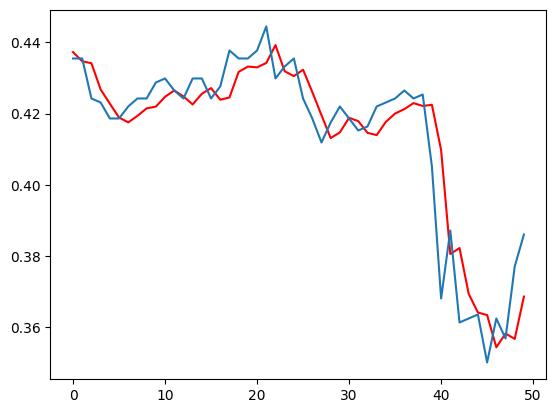

[0.43548568 0.43548568 0.42424038 ... 0.59291996 0.59741808 0.60416526]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
SOLD 86.87 BOUGHT 86.8107
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
SOLD 86.8107 BOUGHT 86.9
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
BOUGHT 86.8107 SOLD 86.9
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
BOUGHT 86.9 SOLD 86.96
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
BOUGHT 86.96 SOLD 87.05
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
SOLD 86.85 BOUGHT 86.9
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
SOLD 86.9 BOUGHT 86.9395
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
BOUGHT 86.9 SOLD 86.9395
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
BOUGHT 86.9395 SOLD 87.04
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
SOLD 86.97 BOUGHT 86.89
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
SOLD 86.89 BOUGHT 87
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
BOUGHT 86.89 SOLD 87.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
BOUGHT 87.0 SOLD 86.99
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
BOUGHT 86.99 SOLD 86.99
1/1 ━━━━━━━━━━━━━━━━━

In [4]:
#TESTING DATASET PREPARATION

pre = model.predict(training_ind[0:blah])
plt.plot(pre, color="red")
plt.plot(training_dep[0:blah])
plt.show()
print(training_dep)

testing_input = scaler.transform(values[training_split:].reshape(-1, 1))
testing_values = []
prediction = []
act = []
lastpred = -1
code = "NONE"
profit = 0
lent = 100
xs = []
for i in range(blah + diff, min(len(testing_input), blah + diff + lent)):
  # x = testing_input[i - blah - diff:i - diff, 0]
  # # print(x)
  # xs.append(x)
  x = np.array([testing_input[i - blah - diff:i - diff, 0]])
  pred = model.predict(np.reshape(x, (x.shape[0], x.shape[1], 1)))[0]
  act.append(values[training_split + i])
  prediction.append(pred)
  if lastpred < 0:
    lastpred = pred
    continue
  if lastpred < pred:
    code = "BUY"
  elif lastpred > pred:
    code = "SELL"
  else:
    code = "NONE"
  lastpred = pred
  if code == "BUY":
    profit += values[training_split + i] - values[training_split + i - 1]
    print("BOUGHT", values[training_split + i - 2], "SOLD", values[training_split + i - 1])
  elif code == "SELL":
    profit += y_close[training_split + i - 1] - y_close[training_split + i]
    print("SOLD", y_close[training_split + i - 1], "BOUGHT", y_close[training_split + i])
print(profit)

# xs = np.array(xs)
# xs = np.reshape(xs, (xs.shape[0], xs.shape[1], 1))
# prediction = model.predict(xs)

prediction = np.array(prediction)
prediction = scaler.inverse_transform(prediction)
act = np.array(act)

100


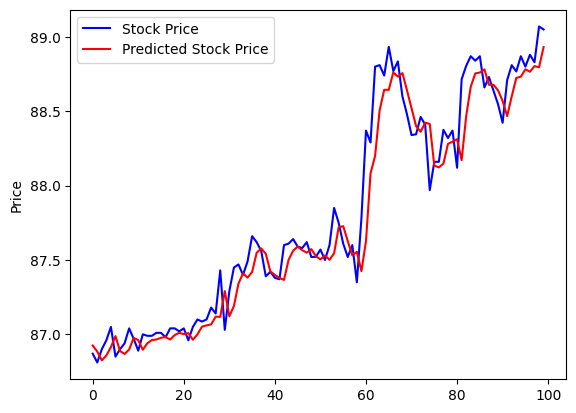

In [5]:
print(len(values[training_split + blah:training_split + blah + lent]))
plt.plot(values[training_split + blah:training_split + blah + lent], color = 'blue', label = 'Stock Price')
plt.plot(prediction, color = 'red', label = 'Predicted Stock Price')
# for i in range(1, lent):
#   plt.axvline(i)
# plt.title('Amazon (AMZN)')
# plt.xlabel('Number of Days since April 26, 2022')
plt.ylabel('Price')
plt.legend()
plt.show()